<a href="https://colab.research.google.com/github/Akshara416/OpenCV-projects/blob/master/cricket_shot_analysis/Bat_and_Ball_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Bat Detection

In [2]:
! git clone https://github.com/gtmray/cricket-shots.git
! cd cricket-shots && pip install -r requirements.txt

Cloning into 'cricket-shots'...
remote: Enumerating objects: 3986, done.
remote: Counting objects: 100% (3986/3986), done.
remote: Compressing objects: 100% (3902/3902), done.
remote: Total 3986 (delta 112), reused 3900 (delta 57), pack-reused 0
Receiving objects: 100% (3986/3986), 116.41 MiB | 33.67 MiB/s, done.
Resolving deltas: 100% (112/112), done.
Checking out files: 100% (3781/3781), done.


In [17]:
import sys
sys.path.insert(0,'/content/drive/MyDrive/Cricket_shots_analysis/')

In [18]:
from predict_bat import predict_bat

## Extracting only label and prob of prediction

Detections: 

[Detection(bounding_box=Rect(left=-5, top=23, right=517, bottom=326), categories=[Category(label='bat', score=0.96484375, index=0)])]


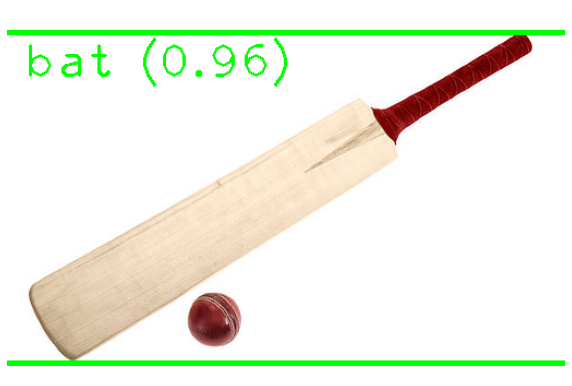

In [19]:
det = predict_bat('/content/drive/MyDrive/Cricket_shots_analysis/images/bat_images/bat_1.jpg')

Detections: 

[Detection(bounding_box=Rect(left=211, top=19, right=312, bottom=98), categories=[Category(label='bat', score=0.9375, index=0)])]


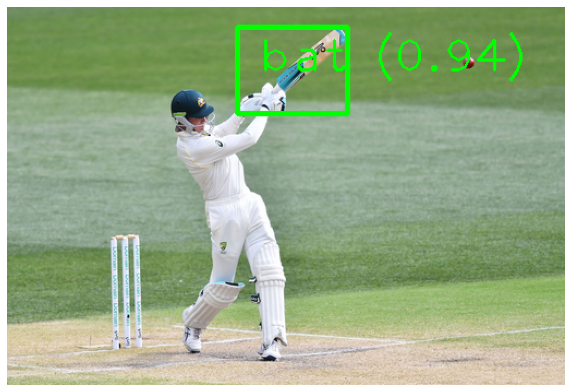

In [31]:
det = predict_bat('/content/drive/MyDrive/Cricket_shots_analysis/images/bat_images/bat_4.jpg')

Detections: 

[Detection(bounding_box=Rect(left=58, top=1, right=103, bottom=71), categories=[Category(label='bat', score=0.87109375, index=0)])]


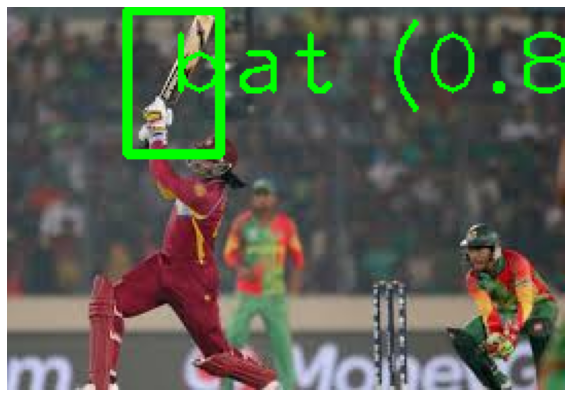

In [30]:
det = predict_bat('/content/drive/MyDrive/Cricket_shots_analysis/images/bat_images/bat_6.jpg')

In [24]:
for detection in det:
  category = detection.categories[0]        
  label = category.label
  probability = round(category.score, 2)
  print(label)
  print(probability)

bat
0.93


In [25]:
det[0]

Detection(bounding_box=Rect(left=-4, top=97, right=459, bottom=246), categories=[Category(label='bat', score=0.92578125, index=0)])

In [26]:
category = det[0].categories[0]        
label = category.label
probability = round(category.score, 2)
print(label)
print(probability)

bat
0.93


## Ball Prediction

In [36]:
cd /content

/content


In [37]:
! git clone https://github.com/haiiamnikhil/balldetection.git

Cloning into 'balldetection'...
remote: Enumerating objects: 100, done.
remote: Counting objects: 100% (100/100), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 100 (delta 57), reused 11 (delta 1), pack-reused 0
Receiving objects: 100% (100/100), 92.50 KiB | 4.87 MiB/s, done.
Resolving deltas: 100% (57/57), done.


In [39]:
cd /content/balldetection

/content/balldetection


     |████████████████████████████████| 1.9 MB 5.1 MB/s 


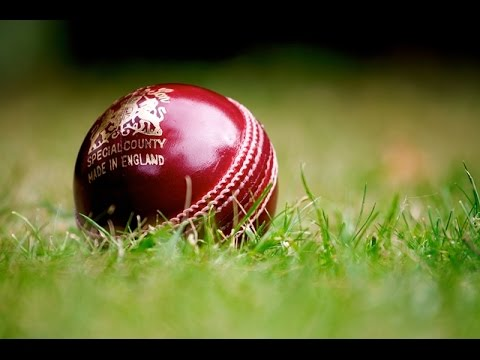

In [40]:
## Downloading youtube video
## Input Video
!pip install -q youtube-dl
from IPython.display import YouTubeVideo

#Sample ball videos - Zs6sMEGmGmo, 
YOUTUBE_ID = 'WLlK1LRj7aI'
YouTubeVideo(YOUTUBE_ID)

In [47]:
#!rm -rf youtube.mp4
# download the youtube with the given ID https://www.youtube.com/watch?v=Zs6sMEGmGmo
#!youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID
# cut the first 10 seconds
video = '/content/drive/MyDrive/Cricket_shots_analysis/videos/balls_2.mp4'
!ffmpeg -y -loglevel info -i $video -t 20 '/content/drive/MyDrive/Cricket_shots_analysis/videos/balls_sample_2.mp4'

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [46]:
pwd

'/content/balldetection'

In [50]:
import cv2
import numpy as np
from glob import glob
import os

__file__ = '/content/balldetection/detector.py'

# Load Yolo
net = cv2.dnn.readNet(os.path.join(os.path.dirname(
    __file__), "yolov4.weights"), os.path.join(os.path.dirname(__file__), "yolov4.cfg"))

In [73]:
video = '/content/drive/MyDrive/Cricket_shots_analysis/videos/balls_sample_1.mp4'
! python detector.py video

[ERROR:0@1.025] global /io/opencv/modules/videoio/src/cap.cpp (164) open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.5.5) /io/opencv/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): video in function 'icvExtractPattern'


1
line 34
line 38
line 40
line 43
<Figure size 1000x1000 with 1 Axes>
1
line 34
line 38
line 40
line 43
<Figure size 1000x1000 with 1 Axes>
1
line 34
line 38
line 40
line 43
<Figure size 1000x1000 with 1 Axes>
1
line 34
line 38
line 40
line 43
<Figure size 1000x1000 with 1 Axes>
1
line 34
line 38
line 40
line 43
<Figure size 1000x1000 with 1 Axes>
1
line 34
line 38
line 40
line 43
<Figure size 1000x1000 with 1 Axes>
1
line 34
line 38
line 40
line 43
<Figure size 1000x1000 with 1 Axes>
1
line 34
line 38
line 40
Traceback (most recent call last):
  File "detector.py", line 45, in <module>
    outs = net.forward(output_layers)
KeyboardInterrupt
